#### Data Science Capstone Project,  Springboard Bootcamp <br> Title: "Improving Restaurant Reputation Using Yelp User Reviews" <br> Reza Taeb <br> San Francisco, Spring 2018 

## Part 2 - Storytelling  

In [1]:
# Importing Necessary Packages and Libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [2]:
# Adjust output view

pd.set_option('display.width', 115)
pd.options.display.max_colwidth = 15
sns.set()

First, Let's load the restaurant and review datasets and review datasets that have been modified in the previous step, Data Wrangling. 

##### (" restaurant.csv  & restaurant_eng.csv & review_restaurant_eng.csv ") ####

In [3]:
# read cleaned CSV files ("review_restaurant_eng", "restaurant_eng") 

df_review_restaurant_eng = pd.read_csv('../review_restaurant_eng.csv')
df_restaurant_eng = pd.read_csv('../restaurant_eng.csv')

In [4]:
# General Information of the two datasets : 

print (df_restaurant_eng.info())
print (df_review_restaurant_eng.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48564 entries, 0 to 48563
Data columns (total 17 columns):
business_id     48564 non-null object
name            48564 non-null object
neighborhood    22075 non-null object
address         48266 non-null object
city            48564 non-null object
state           48564 non-null object
postal_code     48470 non-null object
latitude        48564 non-null float64
longitude       48564 non-null float64
stars           48564 non-null float64
review_count    48564 non-null int64
is_open         48564 non-null int64
attributes      48564 non-null object
categories      48564 non-null object
hours           48564 non-null object
country         48564 non-null object
food_type       23281 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 6.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957736 entries, 0 to 2957735
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    objec

### Part A - EDA on Restaurant Data Frame  <span style="font-size:smaller;">("df_restaurant_eng" data frame)</span> 

In [5]:
# Check the header of df_restaurant_eng dataset 

print (df_restaurant_eng.head(5))

      business_id            name    neighborhood         address            city state postal_code   latitude  \
0  PfOCPjBrlQA...  Brick House...             NaN    581 Howe Ave  Cuyahoga Falls    OH       44221  41.119535   
1  fNMVV_ZX7CJ...  Showmars Go...          Uptown    600 E 4th St       Charlotte    NC       28202  35.221647   
2  l09JfMeQ6yn...  Alize Catering  Yonge and E...   2459 Yonge St         Toronto    ON     M4P 2H6  43.711399   
3  1K4qrnfyzKz...  Chula Taber...     Leslieville  1058 Gerrar...         Toronto    ON     M4M 3A6  43.669256   
4  Dj0S-Oe4ytR...    Panera Bread             NaN  38295 Chest...          Elyria    OH       44035  41.343078   

   longitude  stars  review_count  is_open      attributes      categories           hours country food_type  
0 -81.475690    3.5           116        1  {'Alcohol':...  ['American ...  {'Monday': ...     USA  American  
1 -80.839345    3.5             7        1  {'GoodForMe...  ['Restauran...  {'Friday': ...   

Toronto        6424
Las Vegas      5533
Phoenix        3361
Montréal       2981
Charlotte      2309
Pittsburgh     2039
Scottsdale     1334
Cleveland      1278
Edinburgh      1246
Mississauga    1223
Name: city, dtype: int64
ON     12291
AZ      9802
NV      6680
QC      4528
OH      4521
NC      3622
PA      3396
WI      1387
EDH     1210
IL       577
Name: state, dtype: int64
3.5    12137
4.0    11774
3.0     9053
4.5     5196
2.5     5062
2.0     2784
5.0     1134
1.5     1089
1.0      335
Name: stars, dtype: int64
USA    30196
CAN    16819
UK      1549
Name: country, dtype: int64
American    8401
Italian     3788
Mexican     3604
Chinese     3318
Japanese    1972
Indian      1209
Thai         989
Name: food_type, dtype: int64


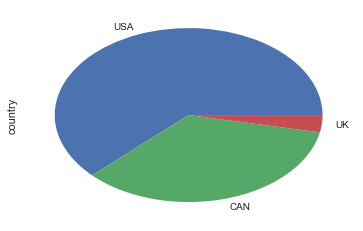

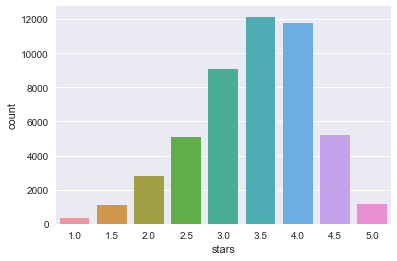

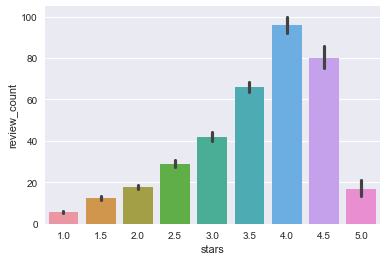

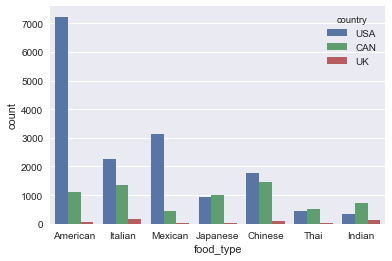

count    48564.000000
mean        60.896611
std        155.282867
min          3.000000
25%          7.000000
50%         19.000000
75%         56.000000
max       7361.000000
Name: review_count, dtype: float64
           count       mean         std  min  25%   50%   75%     max
country                                                              
CAN      16819.0  30.961532   59.316654  3.0  5.0  12.0  33.0  1953.0
UK        1549.0  14.883150   20.463048  3.0  4.0   8.0  17.0   266.0
USA      30196.0  79.930686  189.287147  3.0  9.0  26.0  78.0  7361.0
            count       mean         std  min   25%   50%     75%     max
food_type                                                                
American   8401.0  95.094036  213.269908  3.0  11.0  33.0   92.00  5447.0
Chinese    3318.0  46.087101   98.337412  3.0   7.0  18.0   49.00  2594.0
Indian     1209.0  45.209264   84.383713  3.0   6.0  17.0   48.00  1152.0
Italian    3788.0  64.285111  129.511216  3.0   7.0  21.0   66.25  23

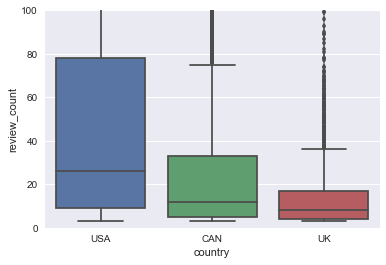

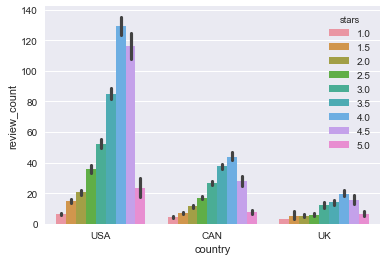

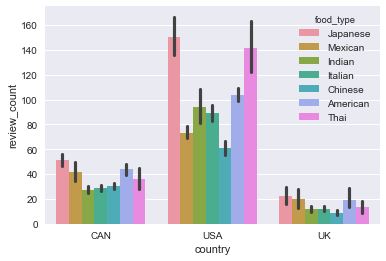

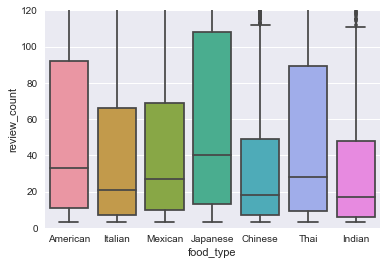

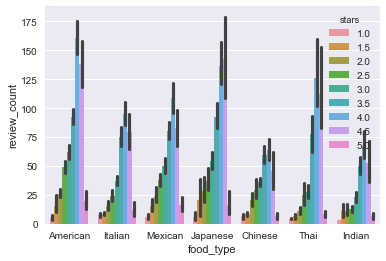

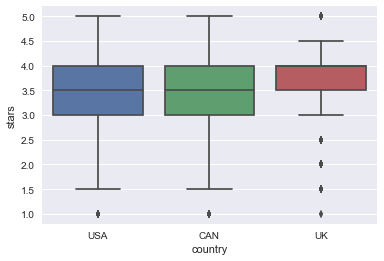

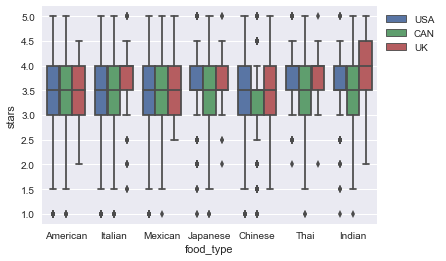

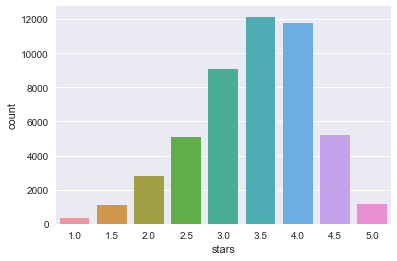

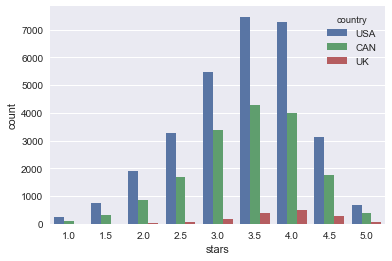

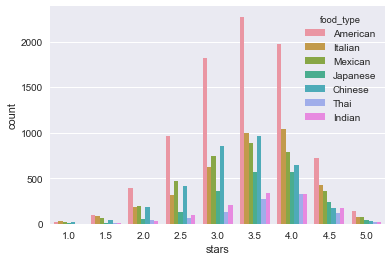

In [6]:
# Count some columns entries ('state' , 'city' , 'stars' , ' country' , 'food_type' , 'review_count')


print (df_restaurant_eng['city'].value_counts().head(10))
print (df_restaurant_eng['state'].value_counts().head(10))
print (df_restaurant_eng['stars'].value_counts().head(10))
print (df_restaurant_eng['country'].value_counts().head())
print (df_restaurant_eng['food_type'].value_counts().head(10))


# Plot "Country" pie chart (number of restaurants)

df_restaurant_eng['country'].value_counts().plot(kind='pie')
plt.show()


# Plot "Stars" column 

sns.countplot(x='stars' , data=df_restaurant_eng)
plt.show()

sns.barplot(x='stars' , y='review_count' , data=df_restaurant_eng)
plt.show()

# Plot "Food_type" column

sns.countplot(x='food_type' , hue='country' , data=df_restaurant_eng)
plt.show()


# Some statistics of "review_count" column 

print (df_restaurant_eng['review_count'].describe())
print (df_restaurant_eng.groupby('country')['review_count'].describe())
print (df_restaurant_eng.groupby('food_type')['review_count'].describe())
print (df_restaurant_eng.groupby('stars')['review_count'].describe())
print (df_restaurant_eng.groupby(['country','food_type'])['review_count'].describe())
print (df_restaurant_eng.groupby(['food_type','stars'])['review_count'].describe())
print (df_restaurant_eng.groupby('stars')['review_count'].mean())

# Some statistics of"stars" column 

print (df_restaurant_eng['stars'].describe())
print (df_restaurant_eng.groupby('country')['stars'].describe())
print (df_restaurant_eng.groupby('food_type')['stars'].describe())
#print (df_restaurant_eng.groupby('stars')['review_count'].describe())   ---> does not make sense 
print (df_restaurant_eng.groupby(['country','food_type'])['stars'].describe())
print (df_restaurant_eng.groupby(['food_type','country'])['stars'].describe())


# Boxplot for "review_counts"

sns.boxplot(x='country', y="review_count" , data=df_restaurant_eng)
plt.ylim(0,100)
plt.show()

sns.barplot(x='country' , y='review_count' , hue='stars' , data=df_restaurant_eng)
plt.show()

sns.barplot(x='country' , y='review_count' , hue='food_type' , data=df_restaurant_eng.reset_index().sort_values('review_count'))
plt.show()

sns.boxplot(x='food_type' , y='review_count' , data=df_restaurant_eng)
plt.ylim(0,120)
plt.show()

sns.barplot(x='food_type' , y='review_count' , hue='stars' , data=df_restaurant_eng)
plt.show()


# Boxplot for "Star" column 

sns.boxplot(x='country' , y='stars' , data=df_restaurant_eng)
plt.show()

sns.boxplot(x='food_type' , y='stars' , hue='country' , data=df_restaurant_eng)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()



# Histogram of stars (1 : all , 2: hue = 'country' , 3: hue = 'food_type')

#sns.distplot(df_restaurant_eng['stars'] , hist=True, kde=False, hue=df_restaurant_eng['country'] )
#plt.show()

sns.countplot(x='stars' , data=df_restaurant_eng)
plt.show()

sns.countplot(x='stars' , hue='country' , data=df_restaurant_eng)
plt.show()

sns.countplot(x='stars' , hue='food_type' , data=df_restaurant_eng)
plt.show()



In [7]:
# Group restaurant_eng based on "country" 

df_restaurant_eng_grp_coun = df_restaurant_eng.groupby(['country','stars'])['review_count'].agg(['count','mean','sum'])
print (df_restaurant_eng_grp_coun)

               count        mean     sum
country stars                           
CAN     1.0      103    4.378641     451
        1.5      332    6.894578    2289
        2.0      844   11.478673    9688
        2.5     1705   17.072727   29109
        3.0     3387   26.830824   90876
        3.5     4295   37.561118  161325
        4.0     3995   43.830288  175102
        4.5     1775   27.644507   49069
        5.0      383    7.396867    2833
UK      1.0        2    3.000000       6
        1.5       10    5.300000      53
        2.0       31    5.387097     167
        2.5       77    5.883117     453
        3.0      191   12.335079    2356
        3.5      377   13.944297    5257
        4.0      489   19.770961    9668
        4.5      294   15.639456    4598
        5.0       78    6.358974     496
USA     1.0      230    6.200000    1426
        1.5      747   14.732262   11005
        2.0     1909   20.551598   39233
        2.5     3280   35.699085  117093
        3.0     

In [8]:
# Define limit for number of "reviews" (review_count)


df_restaurant_eng_enough = df_restaurant_eng[df_restaurant_eng['review_count'] > 10]
df_restaurant_eng_enough['country'].value_counts()

USA    21665
CAN     9177
UK       598
Name: country, dtype: int64

In [9]:
# Check the countries review counts for each country and stars (review limit > 10)


df_restaurant_eng_enough.groupby(['country','stars'])['review_count'].agg(['count','mean','sum'])

count        mean     sum
country stars                           
CAN     1.0        5   14.000000      70
        1.5       53   19.000000    1007
        2.0      250   26.244000    6561
        2.5      742   32.362534   24013
        3.0     1881   43.734716   82265
        3.5     2789   54.788455  152805
        4.0     2564   65.094384  166902
        4.5      851   51.761457   44049
        5.0       42   30.523810    1282
UK      1.5        1   19.000000      19
        2.0        2   12.000000      24
        2.5        8   15.125000     121
        3.0       62   26.435484    1639
        3.5      147   27.707483    4073
        4.0      249   33.281124    8287
        4.5      121   30.528926    3694
        5.0        8   23.625000     189
USA     1.0       28   15.607143     437
        1.5      330   26.333333    8690
        2.0     1020   33.347059   34014
        2.5     2063   53.398449  110161
        3.0     3867   71.693044  277237
        3.5     5941  105.355496  625917
        4.0     5878  159.268459  936180
        4.5     2322  154.530146  358819
        5.0      216   61.708333   13329

In [10]:
# Final Dataset with 7 top types of food and no Nan

df_rest_eng_top7 = df_restaurant_eng.dropna(subset=['food_type'])
df_rest_eng_top7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 48563
Data columns (total 17 columns):
business_id     23281 non-null object
name            23281 non-null object
neighborhood    9786 non-null object
address         23196 non-null object
city            23281 non-null object
state           23281 non-null object
postal_code     23256 non-null object
latitude        23281 non-null float64
longitude       23281 non-null float64
stars           23281 non-null float64
review_count    23281 non-null int64
is_open         23281 non-null int64
attributes      23281 non-null object
categories      23281 non-null object
hours           23281 non-null object
country         23281 non-null object
food_type       23281 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 3.2+ MB


In [11]:
# Grouping restaurant_eng data frame based on "food_type" 

df_rest_eng_top7_grp_foodtype = df_rest_eng_top7.groupby('food_type')
df_rest_eng_top7_grp_foodtype['stars','review_count'].agg(['sum','mean','min','max']).head(7)

stars                     review_count                     
               sum      mean  min  max          sum       mean min   max
food_type                                                               
American   28588.0  3.402928  1.0  5.0       798885  95.094036   3  5447
Chinese    10904.5  3.286468  1.0  5.0       152917  46.087101   3  2594
Indian      4327.5  3.579404  1.0  5.0        54658  45.209264   3  1152
Italian    13175.5  3.478221  1.0  5.0       243512  64.285111   3  2349
Japanese    7065.0  3.582657  1.0  5.0       191646  97.183570   3  3262
Mexican    12184.5  3.380827  1.0  5.0       249162  69.134850   3  2448
Thai        3543.0  3.582406  1.0  5.0        81624  82.531850   3  3964

In [12]:
df_rest_eng_top7_grp_foodtype['review_count'].describe()

,count,mean,std,min,25%,50%,75%,max
food_type,,,,,,,,
American,8401.0,95.094036,213.269908,3.0,11.0,33.0,92.00,5447.0
Chinese,3318.0,46.087101,98.337412,3.0,7.0,18.0,49.00,2594.0
Indian,1209.0,45.209264,84.383713,3.0,6.0,17.0,48.00,1152.0
Italian,3788.0,64.285111,129.511216,3.0,7.0,21.0,66.25,2349.0
Japanese,1972.0,97.183570,176.343833,3.0,13.0,40.0,108.00,3262.0
Mexican,3604.0,69.134850,133.862843,3.0,10.0,27.0,69.00,2448.0
Thai,989.0,82.531850,184.999957,3.0,9.0,28.0,89.00,3964.0


In [13]:
# Grouping "restaurant english spoken for top 7 food type" 

df_rest_eng_top7_grp_foodtype_grp_stars = df_rest_eng_top7.groupby(['food_type','stars'])
df_rest_eng_top7_grp_foodtype_grp_stars['review_count'].agg(['sum','count'])


sum  count
food_type stars               
American  1.0       104     21
          1.5      1514     99
          2.0     10372    398
          2.5     47251    965
          3.0    112290   1821
          3.5    209691   2273
          4.0    316116   1970
          4.5     98795    717
          5.0      2752    137
Chinese   1.0       122     19
          1.5       354     41
          2.0      3810    188
          2.5     11926    410
          3.0     30533    852
          3.5     56823    962
          4.0     41233    644
          4.5      7920    172
          5.0       196     30
Indian    1.0         6      2
          1.5       149     14
          2.0       308     27
          2.5      1259     99
          3.0      4704    204
          3.5     16751    338
          4.0     22460    332
          4.5      8874    170
          5.0       147     23
Italian   1.0       205     28
          1.5       780     88
          2.0      2781    180
...                 ...    ...
          4.0     98996   1042
          4.5     34036    431
          5.0       896     75
Japanese  1.0        36      6
          1.5       209     10
          2.0      1364     48
          2.5      5016    135
          3.0     19484    357
          3.5     52104    564
          4.0     78548    574
          4.5     34279    241
          5.0       606     37
Mexican   1.0        94     15
          1.5      1016     65
          2.0      4670    192
          2.5     18025    475
          3.0     36798    741
          3.5     71271    887
          4.0     86219    792
          4.5     29810    360
          5.0      1259     77
Thai      1.0         9      2
          1.5        82     13
          2.0       516     46
          2.5      1473     60
          3.0      3692    134
          3.5     20803    269
          4.0     41837    331
          4.5     13067    116
          5.0       145     18

[63 rows x 2 columns]

In [14]:
# Grouping "restaurant english spoken restaurants serving top 7 food types and have more than 10 reviews" 

df_rest_eng_top7_threshold10= df_rest_eng_top7[df_rest_eng_top7['review_count'] >= 10]

df_rest_eng_top7_threshold10_grp_foodtype = df_rest_eng_top7_threshold10.groupby('food_type')
print (df_rest_eng_top7_threshold10_grp_foodtype['review_count'].describe())

df_rest_eng_top7_threshold10_grp_foodtype_grp_stars = df_rest_eng_top7_threshold10.groupby(['food_type','stars'])
print (df_rest_eng_top7_threshold10_grp_foodtype_grp_stars['review_count'].agg(['sum','count']))

            count        mean         std   min    25%   50%    75%     max
food_type                                                                  
American   6622.0  119.176986  234.445681  10.0  24.00  50.0  119.0  5447.0
Chinese    2273.0   64.806423  114.030684  10.0  17.00  33.0   73.0  2594.0
Indian      772.0   67.886010   98.640105  10.0  18.00  35.0   74.0  1152.0
Italian    2621.0   90.547882  148.333559  10.0  19.00  41.0   99.0  2349.0
Japanese   1572.0  120.510178  190.603432  10.0  26.75  60.5  134.0  3262.0
Mexican    2760.0   88.585870  147.592463  10.0  20.75  41.0   92.0  2448.0
Thai        723.0  110.988935  209.326661  10.0  23.00  56.0  125.5  3964.0
                    sum  count
food_type stars               
American  1.0        30      1
          1.5      1208     37
          2.0      9589    253
          2.5     46054    734
          3.0    110088   1444
          3.5    207677   1913
          4.0    314329   1661
          4.5     97933    540
      

American    8401
Italian     3788
Mexican     3604
Chinese     3318
Japanese    1972
Indian      1209
Thai         989
Name: food_type, dtype: int64
country  food_type
CAN      Chinese      1450
         Italian      1366
         American     1098
         Japanese     1021
         Indian        718
         Thai          502
         Mexican       438
UK       Italian       158
         Indian        135
         Chinese        96
         American       71
         Thai           41
         Mexican        31
         Japanese       30
USA      American     7232
         Mexican      3135
         Italian      2264
         Chinese      1772
         Japanese      921
         Thai          446
         Indian        356
Name: food_type, dtype: int64
American    6622
Mexican     2760
Italian     2621
Chinese     2273
Japanese    1572
Indian       772
Thai         723
Name: food_type, dtype: int64
country  food_type
CAN      Chinese       867
         Italian       774
         Japa

/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


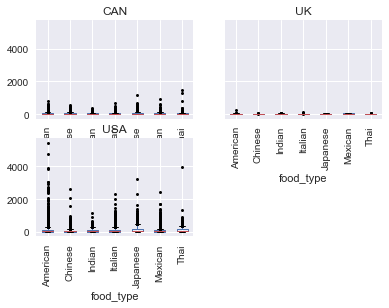

          review_count                     stars                   
                 count     sum        mean count      sum      mean
food_type                                                          
American          6622  789190  119.176986  6622  22694.0  3.427061
Chinese           2273  147305   64.806423  2273   7567.0  3.329081
Indian             772   52408   67.886010   772   2814.0  3.645078
Italian           2621  237326   90.547882  2621   9305.5  3.550362
Japanese          1572  189442  120.510178  1572   5654.5  3.597010
Mexican           2760  244497   88.585870  2760   9394.0  3.403623
Thai               723   80245  110.988935   723   2652.5  3.668741


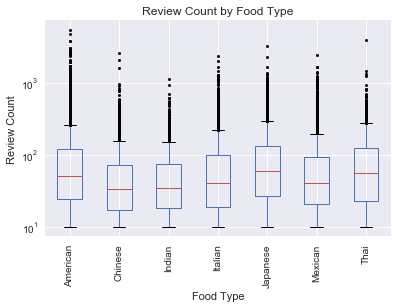

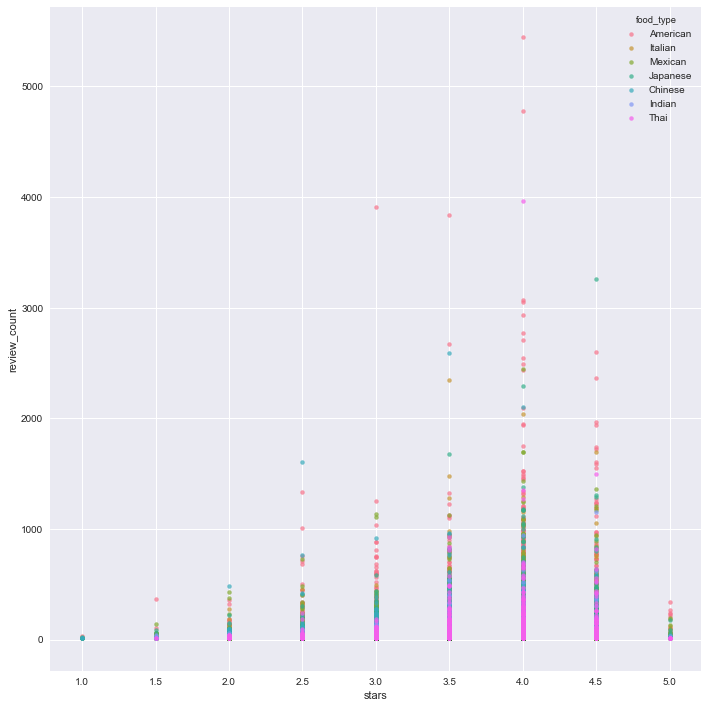

In [15]:
# So far important datasets for businesses : "df_rest_eng " & "df_rest_eng_thre_10" & 
#                                          "df_rest_thre_10_grp_foodtype" & "df_rest_thre_10_grp_foodtype_grp_stars"

# Some visualization 

# 1 - "FOOD TYPE"  number in our whole dataset and in each county

print (df_restaurant_eng['food_type'].value_counts())
print (df_restaurant_eng.groupby('country')['food_type'].value_counts())

# 2 - "Food Type" number in our shorter business data set and based on each country(businesses with more than 10 reviews)

print (df_rest_eng_top7_threshold10['food_type'].value_counts())
print (df_rest_eng_top7_threshold10.groupby('country')['food_type'].value_counts())


# 3 - "Review_count" for each "food_type" in our shorter business dataset for diff countries 

print (df_rest_eng_top7_threshold10.groupby(['country','food_type'])['review_count','stars'].agg(['count','sum','mean']))

plt.figure(figsize=(20,10))
plt.tight_layout()
df_rest_eng_top7_threshold10.groupby('country').boxplot(column = 'review_count' , by='food_type' , rot=90 , sym='k.')
plt.xlabel('Food Type')
plt.ylabel('Review Count')
plt.title('Review Count by Food Type')
plt.yscale("log")
plt.suptitle("")
plt.show()

# 4 - "Review_count" and "Stars" for each "food_type" in our shortet business dataset 

print (df_rest_eng_top7_threshold10.groupby('food_type')['review_count','stars'].agg(['count','sum','mean']))

df_rest_eng_top7_threshold10.boxplot(column = 'review_count' , by='food_type' , rot=90 , sym='k.' )
plt.xlabel('Food Type')
plt.ylabel('Review Count')
plt.title('Review Count by Food Type')
plt.yscale("log")
plt.suptitle("")
plt.show()


# df_rest_eng_top7_threshold10.scatter 

sns.lmplot( x="stars", y="review_count", data=df_rest_eng_top7_threshold10, fit_reg=False, hue='food_type' ,legend_out=False ,  size=10, scatter_kws={"alpha":0.7 ,"s":20})
plt.show()

In [16]:
# should I focus on US ? 

#print (df_rest_eng.info())

#df_rest_eng_US = df_rest_eng[df_rest_eng['country'] == 'USA']

#print (df_rest_eng_US.info())

#print (df_rest_eng_US['food_type'].value_counts())
#print (df_rest_eng_US.groupby(['food_type','stars'])['review_count'].agg(['count','sum','mean']))




In [17]:
# All countries 

# All countries with all review counts 
#print (df_rest_eng.groupby(['food_type','stars'])['review_count'].agg(['count','sum','mean']))

#df_rest_eng.boxplot(by='food_type' , column='review_count'  , rot=90)
#plt.yscale("log")
#plt.suptitle("")
#plt.show()

# All countries with threshold for review counts 

#df_rest_eng_thre_10 = df_rest_eng[df_rest_eng['review_count'] >= 10]

#print (df_rest_eng_thre_10.info())

#print (df_rest_eng_thre_10.groupby(['food_type','stars'])['review_count'].agg(['count','sum','mean']))

# Just USA ! 

# USA with all review counts 
#print (df_rest_eng_US.groupby(['food_type','stars'])['review_count'].agg(['count','sum','mean']))

#df_rest_eng_US.boxplot(by='food_type' , column='review_count'  , rot=90)
#plt.yscale("log")
#plt.suptitle("")
#plt.show()



# USA with assigning threshold for review_counts 
#df_rest_eng_US_thre_10 = df_rest_eng_US[df_rest_eng_US['review_count'] >= 10]

#print (df_rest_eng_US_thre_10.info())

#print (df_rest_eng_US_thre_10.groupby(['food_type','stars'])['review_count'].agg(['count','sum','mean']))

### Part B - EDA on Review Data Frame  <span style="font-size:smaller;">("df_review_restaurant_eng" data frame)</span> 

In [18]:
# Load the clean "review_restaurant_eng" 

df_review_restaurant_eng = pd.read_csv('../review_restaurant_eng.csv' )

In [19]:
# General inforamtion of "review_restaurant_eng" dataframe

print (df_review_restaurant_eng.info())
print (df_review_restaurant_eng.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957736 entries, 0 to 2957735
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           object
text           object
useful         float64
funny          float64
cool           float64
dtypes: float64(3), int64(1), object(5)
memory usage: 203.1+ MB
None
        review_id         user_id     business_id  stars        date            text  useful  funny  cool
0  v0i_UHJMo_h...  bv2nCi5Qv5v...  0W4lkclzZTh...      5  2016-05-28  Love the st...     0.0    0.0   0.0
1  vkVSCC7xljj...  bv2nCi5Qv5v...  AEx2SYEUJmT...      5  2016-05-28  Super simpl...     0.0    0.0   0.0
2  n6QzIUObkYs...  bv2nCi5Qv5v...  VR6GpWIda3S...      5  2016-05-28  Small unass...     0.0    0.0   0.0
3  MV3CcKScW05...  bv2nCi5Qv5v...  CKC0-MOWMqo...      5  2016-05-28  Lester's is...     0.0    0.0   0.0
4  IXvOzsEMYti...  bv2nCi5Qv5v...  ACFtxLv8pGr...      4  2016-05-28  Love coming...     

4JNXUYY8wbaaDmk3BPzlWw    7362
RESDUcs7fIiihp38-d6_6g    7006
K7lWdNUhCbcnEvI0NhGewg    5951
cYwJA2A6I12KNkm2rtXd5g    5448
DkYS3arLOhA8si5uUEmHOw    4870
f4x1YBxkLrZg652xt2KR5g    4774
2weQS-RnoOBhb1KsHKyoSQ    4018
KskYqH1Bi7Z_61pH6Om8pg    3965
eoHdUeQDNgQ6WYEnP2aiRw    3911
ujHiaprwCQ5ewziu0Vi9rw    3836
iCQpiavjjPzJ5_3gPD5Ebg    3741
El4FC8jcawUVgw_0EIcbaQ    3445
hihud--QRriCYZw1zZvW4g    3264
7sPNbCx7vGAaH7SbNPZ6oA    3064
g8OnV26ywJlZpezdBnOWUQ    3051
XZbuPXdyA0ZtTu3AzqtQhg    3011
OETh78qcgDltvHULowwhJg    2933
P7pxQFqr7yBKMMI2J51udw    2771
XXW_OFaYQkkGOGniujZFHg    2700
HhVmDybpU7L50Kb5A0jXTg    2673
yfxDa8RFOvJPQh0rNtakHA    2595
3kdSl5mo9dWC4clrQjEDGg    2594
QJatAcxYgK1Zp9BRZMAx7g    2551
YJ8ljUhLsz6CtT_2ORNFmg    2502
NvKNe9DnQavC9GstglcBJQ    2490
RwMLuOkImBIqqYj4SSKSPg    2447
Cni2l-VKG_pdospJ6xliXQ    2440
faPVqws-x-5k2CQKDNtHxw    2361
G-5kEa6E6PD5fkBRuA7k9Q    2350
fL-b760btOaGa85OJ9ut3w    2320
                          ... 
0tRzi5-EswZV5UvXFTLCRw       3
dJBUz34x

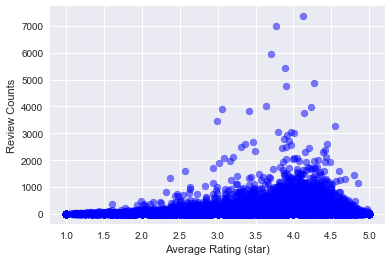

/Users/rtmac/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


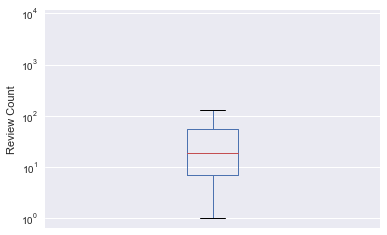

In [20]:
## Review dataset ("df_review_restaurant_eng")

print (df_review_restaurant_eng['business_id'].value_counts())


# Grouing businesses 

df_review_grp_busi = df_review_restaurant_eng.groupby('business_id')['stars'].agg(['count','mean'])
print (df_review_grp_busi.sort_values('count' , ascending = False).head(5))
print (df_review_grp_busi.sort_values('count' , ascending = False).tail(5))

# plot scatter plot of "review count" and "stars" 

plt.scatter(x=df_review_grp_busi['mean'], y=df_review_grp_busi['count'], alpha=0.5 , color='b')
plt.xlabel("Average Rating (star)")
plt.ylabel("Review Counts")
plt.show()


# plot boxplot of  "review count" 

df_review_grp_busi.boxplot(column='count')
plt.yscale("log")
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.ylabel("Review Count")
plt.show()

In [21]:
# Check some columns : 

print (len(df_review_restaurant_eng['user_id'].unique()))
print (len(df_review_restaurant_eng['business_id'].unique()))
print (df_review_restaurant_eng['business_id'].value_counts())

866287
48565
4JNXUYY8wbaaDmk3BPzlWw    7362
RESDUcs7fIiihp38-d6_6g    7006
K7lWdNUhCbcnEvI0NhGewg    5951
cYwJA2A6I12KNkm2rtXd5g    5448
DkYS3arLOhA8si5uUEmHOw    4870
f4x1YBxkLrZg652xt2KR5g    4774
2weQS-RnoOBhb1KsHKyoSQ    4018
KskYqH1Bi7Z_61pH6Om8pg    3965
eoHdUeQDNgQ6WYEnP2aiRw    3911
ujHiaprwCQ5ewziu0Vi9rw    3836
iCQpiavjjPzJ5_3gPD5Ebg    3741
El4FC8jcawUVgw_0EIcbaQ    3445
hihud--QRriCYZw1zZvW4g    3264
7sPNbCx7vGAaH7SbNPZ6oA    3064
g8OnV26ywJlZpezdBnOWUQ    3051
XZbuPXdyA0ZtTu3AzqtQhg    3011
OETh78qcgDltvHULowwhJg    2933
P7pxQFqr7yBKMMI2J51udw    2771
XXW_OFaYQkkGOGniujZFHg    2700
HhVmDybpU7L50Kb5A0jXTg    2673
yfxDa8RFOvJPQh0rNtakHA    2595
3kdSl5mo9dWC4clrQjEDGg    2594
QJatAcxYgK1Zp9BRZMAx7g    2551
YJ8ljUhLsz6CtT_2ORNFmg    2502
NvKNe9DnQavC9GstglcBJQ    2490
RwMLuOkImBIqqYj4SSKSPg    2447
Cni2l-VKG_pdospJ6xliXQ    2440
faPVqws-x-5k2CQKDNtHxw    2361
G-5kEa6E6PD5fkBRuA7k9Q    2350
fL-b760btOaGa85OJ9ut3w    2320
                          ... 
0tRzi5-EswZV5UvXFTLCRw    


Let's check what the **business_id='0'** is !! 

In [22]:
exp = df_review_restaurant_eng[df_review_restaurant_eng['business_id']=='0']
print (exp)

              review_id user_id business_id  stars date text  useful  funny  cool
1857773  All the goo...       1           0      1  NaN  NaN     NaN    NaN   NaN


I noticed that this row does not exist in the original review data frame, I do not know how this came into this subset, anyhow I removed it.

In [23]:
df_review_restaurant_eng = df_review_restaurant_eng[df_review_restaurant_eng['business_id']!='0']

In oredr to work with "date" column, it is better to convert its type to ** datetime ** (from string)

In [24]:
# Covert "date" column to datetime type

df_review_restaurant_eng['date'] = pd.to_datetime(df_review_restaurant_eng['date'], format='%Y-%m-%d')

In [25]:
print (type(df_review_restaurant_eng.iloc[4,4]))

<class 'pandas._libs.tslib.Timestamp'>


In [26]:
# Looking to the "ratings" given by users through "years" 

df_review_restaurant_eng_grp_year = df_review_restaurant_eng.groupby([df_review_restaurant_eng.date.dt.year])['stars'].agg(['count','mean','std'])
print (df_review_restaurant_eng_grp_year)

       count      mean       std
date                            
2004       8  4.125000  0.640870
2005     470  4.010638  0.896507
2006    2846  3.770555  1.076212
2007   12137  3.757683  1.082474
2008   32252  3.666749  1.129546
2009   58544  3.626144  1.170284
2010  110318  3.634167  1.170615
2011  170275  3.623239  1.219496
2012  202222  3.608084  1.267207
2013  268200  3.627405  1.296896
2014  389124  3.667397  1.353523
2015  515831  3.702470  1.387453
2016  580414  3.723277  1.418872
2017  615094  3.743738  1.431998


There are not enough entries in the first two years (2004, 2005), so let's just look at the "mean" and "standard deviation" of the last 12 years (2006-2017) : 

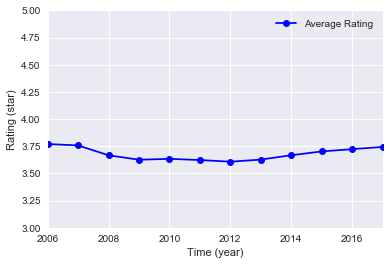

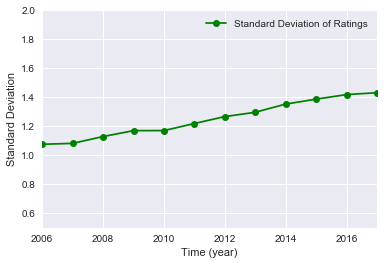

In [27]:
# Plot "star" average and standard deviation of user reviews since 2006 

df_review_restaurant_eng_grp_year_new = df_review_restaurant_eng_grp_year.iloc[2:,]
df_review_restaurant_eng_grp_year_new= df_review_restaurant_eng_grp_year_new.reset_index()

df_review_restaurant_eng_grp_year_new.plot(x="date",y="mean",marker='o',label = 'Average Rating', color = 'b' )
plt.ylim(3,5)
plt.xlabel('Time (year)')
plt.ylabel('Rating (star)')
plt.show()

df_review_restaurant_eng_grp_year_new.plot(x="date",y="std",marker='o',label = 'Standard Deviation of Ratings',color ='g' )
plt.xlabel('Time (year)')
plt.ylabel('Standard Deviation')
plt.ylim(0.5,2)
plt.show()

So based on the above table and charts, we noticed an interesting fact and that is through time restaurants' ratings tend to be distributed around the same average **(around 3.65)** every year, however by passing time the rating distribution get more divers ** (standard deviation rose almost 32 percent) **.    
In other words, restaurants tend to get more diverse ratings by passing time or users tend to be more attentive when it comes to give ratings to restaurants.       
This finding can be a good motivation for restaurants' owners to pay attention to their customers' reviews and ratings and related analyses.

In [28]:
print (df_review_restaurant_eng.groupby('stars')['funny','cool','useful'].agg(['count','mean','sum']))

         funny                         cool                       useful                     
         count      mean       sum    count      mean       sum    count      mean        sum
stars                                                                                        
1       341467  0.636963  217502.0   341467  0.257079   87784.0   341467  1.364021   465768.0
2       289638  0.588614  170485.0   289638  0.382864  110892.0   289638  1.311154   379760.0
3       417075  0.523031  218143.0   417075  0.583691  243443.0   417075  1.148570   479040.0
4       809859  0.481549  389987.0   809859  0.740233  599484.0   809859  1.170537   947970.0
5      1099695  0.327923  360615.0  1099695  0.559142  614886.0  1099695  0.933763  1026854.0


Based on the above table, it seems that reviews with lower rank were found more funny to the readers than review with higher rate. 
Also, reviews that have higher rank (4,5) are found more cool by other readers than reviews with lower rates (1 and 2 star). 
Finally, it seems that there is a negative correlation between review rating and being recognized useful by readers. In other words, reviews with lower ratings seem to be more useful for other readers.  

#### Now let's do some text pre processing on the modefied clean review_restaurant_eng dataframe. 

In [29]:
# Import Natuaral Language Processing and Textblob library and related packages

import nltk
import string
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter


In [30]:
# A sample of "text" column 

df_review_restaurant_eng['text'].iloc[1]

"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly."

In [31]:
# Getting familiar with "df_review_restaurant_eng" again

print (df_review_restaurant_eng.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2957735 entries, 0 to 2957735
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           datetime64[ns]
text           object
useful         float64
funny          float64
cool           float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 305.7+ MB
None


In [32]:
# Add new column to "df_review_restaurant_eng" as "word_list" (list of words of review's text), also I modified the original 'text' column by removing puncuations and lowercasing. 

df_review_restaurant_eng['text'] = df_review_restaurant_eng['text'].apply(lambda x : " ".join(word for word in x.translate(str.maketrans('','',string.punctuation)).lower().split()))
df_review_restaurant_eng.loc[:,'word_list'] = np.nan
df_review_restaurant_eng['word_list'] = df_review_restaurant_eng['text'].apply(lambda x : [word for word in x.split()])

In [33]:
# Check "word_list" column 

print (df_review_restaurant_eng['word_list'].head(10))
print (df_review_restaurant_eng['word_list'][0])

0    [love, the,...
1    [super, sim...
2    [small, una...
3    [lesters, i...
4    [love, comi...
5    [who, would...
6    [not, bad, ...
7    [this, is, ...
8    [server, wa...
9    [wanted, to...
Name: word_list, dtype: object
['love', 'the', 'staff', 'love', 'the', 'meat', 'love', 'the', 'place', 'prepare', 'for', 'a', 'long', 'line', 'around', 'lunch', 'or', 'dinner', 'hours', 'they', 'ask', 'you', 'how', 'you', 'want', 'you', 'meat', 'lean', 'or', 'something', 'maybe', 'i', 'cant', 'remember', 'just', 'say', 'you', 'dont', 'want', 'it', 'too', 'fatty', 'get', 'a', 'half', 'sour', 'pickle', 'and', 'a', 'hot', 'pepper', 'hand', 'cut', 'french', 'fries', 'too']


In [34]:
# Add new column as "word_count" 

df_review_restaurant_eng.loc[:,'word_count'] = np.nan
df_review_restaurant_eng['word_count'] = df_review_restaurant_eng['word_list'].apply (lambda x : len(x))

In [35]:
# Check "word_count" column 

print (df_review_restaurant_eng['word_count'].head(10))

0     56
1     35
2     91
3     67
4    101
5    107
6     43
7     80
8     26
9    115
Name: word_count, dtype: int64


One of the most basic features we can extract is the ** number of words** in each review. 

             mean    count
stars                     
1      126.131922   341467
2      136.876805   289638
3      130.166157   417075
4      113.260666   809859
5       87.592629  1099696


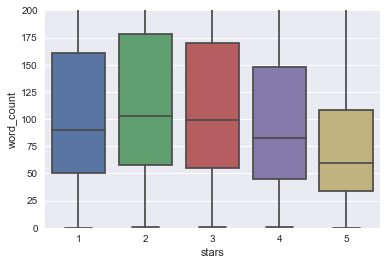

In [36]:
# Plot "word_count" for different star ratings 

print (df_review_restaurant_eng.groupby('stars')['word_count'].agg(['mean','count']))

sns.boxplot(x='stars', y='word_count' , data = df_review_restaurant_eng )
plt.ylim(0,200)
plt.show()

Before going through next steps, since my machine could not execute some commands for the original dataset, I had to reduce the size of dataset and I did some sampling of original dataset to make it smaller. 

The whole dataset is relatively big for my machine so I took a smaller sample of that.

In [37]:
# Make a sample of whole dataset 

df_review_restaurant_eng_small = df_review_restaurant_eng.sample(frac=0.005 , replace=False , random_state=1 )
df_review_restaurant_eng_small = df_review_restaurant_eng_small.reset_index(drop =True)
print (df_review_restaurant_eng_small.info())
print (df_review_restaurant_eng_small['stars'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14789 entries, 0 to 14788
Data columns (total 11 columns):
review_id      14789 non-null object
user_id        14789 non-null object
business_id    14789 non-null object
stars          14789 non-null int64
date           14789 non-null datetime64[ns]
text           14789 non-null object
useful         14789 non-null float64
funny          14789 non-null float64
cool           14789 non-null float64
word_list      14789 non-null object
word_count     14789 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 1.2+ MB
None
5    5546
4    3987
3    2125
1    1696
2    1435
Name: stars, dtype: int64


Two other pre-processing text techniques on the "text" column before moving more forward to next stages are : ** "stopwords removal" ** and ** "lemizitation" ** (converting words into their roots). 

In [38]:
# Create a new column as "text_modified" (doing two above techniques) from "text" column 
# Be patient this line would take probably 30 mins 
nltk.download('wordnet')
lmtzr = WordNetLemmatizer()
df_review_restaurant_eng_small['text_modified'] = df_review_restaurant_eng_small['text'].apply(lambda x: " ".join(lmtzr.lemmatize(word,'v') for word in x.translate(str.maketrans('','',string.punctuation)).lower().split() if word not in stopwords.words('english')))

[nltk_data] Downloading package wordnet to /Users/rtmac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
# Let's check common and rare words : 

word_freq= pd.Series(' '.join(df_review_restaurant_eng_small['text_modified']).split()).value_counts()
top_freq = word_freq[:15]
print (top_freq)

food       11734
place       9587
good        9480
get         8431
go          7866
order       7725
great       6747
come        6620
service     6193
like        6179
time        5980
one         4716
try         4600
make        4463
back        4374
dtype: int64


In [40]:
# Write a function to separate a whole dataset into 5 groups based on their ratings 


df_review_small_1star = df_review_restaurant_eng_small[df_review_restaurant_eng_small['stars'] == 1]
df_review_small_2star = df_review_restaurant_eng_small[df_review_restaurant_eng_small['stars'] == 2]
df_review_small_3star = df_review_restaurant_eng_small[df_review_restaurant_eng_small['stars'] == 3]
df_review_small_4star = df_review_restaurant_eng_small[df_review_restaurant_eng_small['stars'] == 4]
df_review_small_5star = df_review_restaurant_eng_small[df_review_restaurant_eng_small['stars'] == 5]

In [41]:
# Common words for different "star" rating 

# 1 star 

word_freq_1star= pd.Series(' '.join(df_review_small_1star['text_modified']).split()).value_counts()
top_freq_1star = word_freq_1star[:20]
tot_num_word_1star = len(pd.Series(' '.join(df_review_small_1star['text_modified']).split()))
print (pd.DataFrame({'Word Freq' :top_freq_1star , 'Percentage': (100*(top_freq_1star/tot_num_word_1star))}, columns = ['Word Freq','Percentage']))


# 2 star 

word_freq_2star= pd.Series(' '.join(df_review_small_2star['text_modified']).split()).value_counts()
top_freq_2star = word_freq_2star[:20]
tot_num_word_2star = len(pd.Series(' '.join(df_review_small_2star['text_modified']).split()))
print (pd.DataFrame({'Word Freq' :top_freq_2star , 'Percentage': (100*(top_freq_2star/tot_num_word_2star))}, columns = ['Word Freq','Percentage']))

# 3 star

word_freq_3star= pd.Series(' '.join(df_review_small_3star['text_modified']).split()).value_counts()
top_freq_3star = word_freq_3star[:20]
tot_num_word_3star = len(pd.Series(' '.join(df_review_small_3star['text_modified']).split()))
print (pd.DataFrame({'Word Freq' :top_freq_3star , 'Percentage': (100*(top_freq_3star/tot_num_word_3star))}, columns = ['Word Freq','Percentage']))


# 4 star 

word_freq_4star= pd.Series(' '.join(df_review_small_4star['text_modified']).split()).value_counts()
top_freq_4star = word_freq_4star[:20]
tot_num_word_4star = len(pd.Series(' '.join(df_review_small_4star['text_modified']).split()))
print (pd.DataFrame({'Word Freq' :top_freq_4star , 'Percentage': (100*(top_freq_4star/tot_num_word_4star))}, columns = ['Word Freq','Percentage']))

# 5 star

word_freq_5star= pd.Series(' '.join(df_review_small_5star['text_modified']).split()).value_counts()
top_freq_5star = word_freq_5star[:20]
tot_num_word_5star = len(pd.Series(' '.join(df_review_small_5star['text_modified']).split()))
print (pd.DataFrame({'Word Freq' :top_freq_5star , 'Percentage': (100*(top_freq_5star/tot_num_word_5star))}, columns = ['Word Freq','Percentage']))

         Word Freq  Percentage
food          1564    1.431251
order         1470    1.345230
get           1368    1.251887
go            1271    1.163121
place         1077    0.985587
come          1026    0.938916
time           888    0.812629
service        841    0.769618
say            837    0.765957
like           786    0.719286
us             769    0.703729
ask            755    0.690917
take           753    0.689087
one            716    0.655228
back           709    0.648822
would          700    0.640586
wait           648    0.592999
even           641    0.586593
never          607    0.555479
tell           578    0.528941
         Word Freq  Percentage
food          1446    1.439536
order         1151    1.145855
get           1000    0.995530
good           984    0.979602
go             963    0.958695
place          945    0.940776
like           884    0.880049
come           785    0.781491
time           738    0.734701
service        700    0.696871
one     

Now it's time to apply ** N-Grams ** technique to figure out whether some specific sequence of words occur more than others or not. *** Initially, I converted all words to "lower case" and remove "puncuations" ***, so now the "text" column is ready to just do N-Grams techniques. 

In [42]:
# N-Grams on whole words

def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

df_review_restaurant_eng_small.loc[:,'Ngrams_list'] = np.nan
df_review_restaurant_eng_small['Ngrams_list']=df_review_restaurant_eng_small['text'].map(lambda x: find_ngrams(x.split(" "), 5))


print ('---------')


pd.options.display.max_colwidth = 40
print (df_review_restaurant_eng_small['Ngrams_list'].head(5))

# Make a list of all bigrams 

tot_ngrams_list = []
for i in range(len(df_review_restaurant_eng_small['Ngrams_list'])):
    tot_ngrams_list += df_review_restaurant_eng_small['Ngrams_list'].iloc[i]
    
print (tot_ngrams_list[:5])


print ('-----Count Frequency on All Ratings------')

import collections
counter_ngrams = collections.Counter(tot_ngrams_list)

print(counter_ngrams.most_common(20))


print ('------Count Frequency for 1 Star rating ----')

tot_ngrams_list_1star = []
for i in range(len(df_review_restaurant_eng_small['Ngrams_list'])):
    if df_review_restaurant_eng_small['stars'].iloc[i] ==  1 :
        tot_ngrams_list_1star += df_review_restaurant_eng_small['Ngrams_list'].iloc[i]
        

counter_ngrams_1star = collections.Counter(tot_ngrams_list_1star)
print(counter_ngrams_1star.most_common(20))


print ('------Count Frequency for 2 Star rating ----')

tot_ngrams_list_2star = []
for i in range(len(df_review_restaurant_eng_small['Ngrams_list'])):
    if df_review_restaurant_eng_small['stars'].iloc[i] ==  2 :
        tot_ngrams_list_2star += df_review_restaurant_eng_small['Ngrams_list'].iloc[i]
        

counter_ngrams_2star = collections.Counter(tot_ngrams_list_2star)
print(counter_ngrams_2star.most_common(20))

print ('------Count Frequency for 3 Star rating ----')

tot_ngrams_list_3star = []
for i in range(len(df_review_restaurant_eng_small['Ngrams_list'])):
    if df_review_restaurant_eng_small['stars'].iloc[i] ==  3 :
        tot_ngrams_list_3star += df_review_restaurant_eng_small['Ngrams_list'].iloc[i]
        

counter_ngrams_3star = collections.Counter(tot_ngrams_list_3star)
print(counter_ngrams_3star.most_common(20))

print ('------Count Frequency for 4 Star rating ----')

tot_ngrams_list_4star = []
for i in range(len(df_review_restaurant_eng_small['Ngrams_list'])):
    if df_review_restaurant_eng_small['stars'].iloc[i] ==  4 :
        tot_ngrams_list_4star += df_review_restaurant_eng_small['Ngrams_list'].iloc[i]
        

counter_ngrams_4star = collections.Counter(tot_ngrams_list_4star)
print(counter_ngrams_4star.most_common(20))

print ('------Count Frequency for 5 Star rating ----')

tot_ngrams_list_5star = []
for i in range(len(df_review_restaurant_eng_small['Ngrams_list'])):
    if df_review_restaurant_eng_small['stars'].iloc[i] ==  5 :
        tot_ngrams_list_5star += df_review_restaurant_eng_small['Ngrams_list'].iloc[i]
        

counter_ngrams_5star = collections.Counter(tot_ngrams_list_5star)
print(counter_ngrams_5star.most_common(20))

---------
0    [(really, disappointed, in, this, pl...
1    [(service, was, terrible, had, to), ...
2    [(you, probably, already, know, all)...
3    [(simply, unbelievable, craftsmanshi...
4    [(ill, keep, this, short, and), (kee...
Name: Ngrams_list, dtype: object
[('really', 'disappointed', 'in', 'this', 'place'), ('disappointed', 'in', 'this', 'place', 'ive'), ('in', 'this', 'place', 'ive', 'been'), ('this', 'place', 'ive', 'been', 'several'), ('place', 'ive', 'been', 'several', 'times')]
-----Count Frequency on All Ratings------
[(('cant', 'wait', 'to', 'go', 'back'), 97), (('if', 'you', 'are', 'looking', 'for'), 62), (('the', 'best', 'ive', 'ever', 'had'), 60), (('the', 'quality', 'of', 'the', 'food'), 52), (('we', 'will', 'definitely', 'be', 'back'), 48), (('i', 'cant', 'wait', 'to', 'go'), 47), (('if', 'youre', 'looking', 'for', 'a'), 47), (('this', 'is', 'a', 'great', 'place'), 46), (('i', 'will', 'definitely', 'be', 'back'), 46), (('nothing', 'to', 'write', 'home', 'about'),

In [43]:
# N-Grams after removing stopwords 

df_review_restaurant_eng_small.loc[:,'ngrams_list_modified'] = np.nan
df_review_restaurant_eng_small['ngrams_list_modified']=df_review_restaurant_eng_small['text_modified'].map(lambda x: find_ngrams(x.split(" "), 3))


print ('---------')


pd.options.display.max_colwidth = 40
print (df_review_restaurant_eng_small['ngrams_list_modified'].head(5))

# Make a list of all bigrams 

tot_ngrams_list_modified = []
for i in range(len(df_review_restaurant_eng_small['ngrams_list_modified'])):
    tot_ngrams_list_modified += df_review_restaurant_eng_small['ngrams_list_modified'].iloc[i]
    
print (tot_ngrams_list_modified[:5])


print ('-----Count Frequency------')

import collections
counter_ngrams_modified = collections.Counter(tot_ngrams_list_modified)

print(counter_ngrams_modified.most_common(40))


print ('--------Count Frequncy for 1 star rating----')

tot_ngrams_list_modified_1star = []
for i in range(len(df_review_restaurant_eng_small['ngrams_list_modified'])):
    if df_review_restaurant_eng_small['stars'].iloc[i] ==  1 :
        tot_ngrams_list_modified_1star += df_review_restaurant_eng_small['ngrams_list_modified'].iloc[i]
        

counter_ngrams_modified_1star = collections.Counter(tot_ngrams_list_modified_1star)
print(counter_ngrams_modified_1star.most_common(20))


print ('--------Count Frequncy for 2 star rating----')

tot_ngrams_list_modified_2star = []
for i in range(len(df_review_restaurant_eng_small['ngrams_list_modified'])):
    if df_review_restaurant_eng_small['stars'].iloc[i] ==  2 :
        tot_ngrams_list_modified_2star += df_review_restaurant_eng_small['ngrams_list_modified'].iloc[i]
        

counter_ngrams_modified_2star = collections.Counter(tot_ngrams_list_modified_2star)
print(counter_ngrams_modified_2star.most_common(20))

print ('--------Count Frequncy for 3 star rating----')

tot_ngrams_list_modified_3star = []
for i in range(len(df_review_restaurant_eng_small['ngrams_list_modified'])):
    if df_review_restaurant_eng_small['stars'].iloc[i] ==  3 :
        tot_ngrams_list_modified_3star += df_review_restaurant_eng_small['ngrams_list_modified'].iloc[i]
        

counter_ngrams_modified_3star = collections.Counter(tot_ngrams_list_modified_3star)
print(counter_ngrams_modified_3star.most_common(20))

print ('--------Count Frequncy for 4 star rating----')

tot_ngrams_list_modified_4star = []
for i in range(len(df_review_restaurant_eng_small['ngrams_list_modified'])):
    if df_review_restaurant_eng_small['stars'].iloc[i] ==  4 :
        tot_ngrams_list_modified_4star += df_review_restaurant_eng_small['ngrams_list_modified'].iloc[i]
        

counter_ngrams_modified_4star = collections.Counter(tot_ngrams_list_modified_4star)
print(counter_ngrams_modified_4star.most_common(20))

print ('--------Count Frequncy for 5 star rating----')

tot_ngrams_list_modified_5star = []
for i in range(len(df_review_restaurant_eng_small['ngrams_list_modified'])):
    if df_review_restaurant_eng_small['stars'].iloc[i] ==  5 :
        tot_ngrams_list_modified_5star += df_review_restaurant_eng_small['ngrams_list_modified'].iloc[i]
        

counter_ngrams_modified_5star = collections.Counter(tot_ngrams_list_modified_5star)
print(counter_ngrams_modified_5star.most_common(20))

---------
0    [(really, disappoint, place), (disap...
1    [(service, terrible, wait), (terribl...
2    [(probably, already, know), (already...
3    [(simply, unbelievable, craftsmanshi...
4    [(ill, keep, short), (keep, short, p...
Name: ngrams_list_modified, dtype: object
[('really', 'disappoint', 'place'), ('disappoint', 'place', 'ive'), ('place', 'ive', 'several'), ('ive', 'several', 'time'), ('several', 'time', 'service')]
-----Count Frequency------
[(('definitely', 'come', 'back'), 191), (('definitely', 'go', 'back'), 120), (('cant', 'wait', 'go'), 112), (('wait', 'go', 'back'), 110), (('sweet', 'potato', 'fry'), 100), (('would', 'go', 'back'), 94), (('mac', 'n', 'cheese'), 82), (('go', 'back', 'try'), 81), (('food', 'good', 'service'), 78), (('cant', 'go', 'wrong'), 78), (('come', 'back', 'try'), 77), (('would', 'come', 'back'), 76), (('food', 'great', 'service'), 75), (('highly', 'recommend', 'place'), 74), (('best', 'ive', 'ever'), 74), (('never', 'go', 'back'), 73), (('food

## TF - IDF

In [44]:
# TF - IDF 

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()   
# here you can change the 'text' to 'text_modified' if we want to eliminate the impact of stop words.
text_counts = count_vect.fit_transform(df_review_restaurant_eng_small['text'])
feat_name =  count_vect.get_feature_names()
print (text_counts.shape)

(14789, 37328)


In [45]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_counts)
print (text_tfidf.shape)

(14789, 37328)


In [46]:
print (len(feat_name))
print (type(text_counts))

37328
<class 'scipy.sparse.csr.csr_matrix'>


In [47]:
# Examples for finding feature names 

print (text_counts[0]) #first review
print (feat_name[24882])
print ('------------this word should be in the first review 4 times------')
print (df_review_restaurant_eng_small['text'].iloc[0])

  (0, 3338)	1
  (0, 14392)	1
  (0, 5940)	1
  (0, 6472)	1
  (0, 14291)	1
  (0, 35859)	1
  (0, 22993)	1
  (0, 11243)	1
  (0, 10439)	1
  (0, 2713)	1
  (0, 19321)	1
  (0, 23168)	1
  (0, 34758)	1
  (0, 25339)	1
  (0, 3824)	1
  (0, 35604)	1
  (0, 18353)	1
  (0, 10418)	1
  (0, 8682)	1
  (0, 16584)	1
  (0, 15416)	1
  (0, 5647)	1
  (0, 35593)	1
  (0, 16602)	2
  (0, 20626)	1
  :	:
  (0, 28947)	1
  (0, 22246)	1
  (0, 32664)	1
  (0, 36178)	1
  (0, 36091)	1
  (0, 19932)	1
  (0, 15862)	1
  (0, 33423)	5
  (0, 21978)	1
  (0, 33059)	4
  (0, 30013)	1
  (0, 2158)	1
  (0, 17365)	4
  (0, 29237)	3
  (0, 32992)	11
  (0, 2322)	3
  (0, 33330)	1
  (0, 29329)	2
  (0, 3925)	1
  (0, 17486)	2
  (0, 24882)	4
  (0, 33129)	4
  (0, 16763)	3
  (0, 10108)	1
  (0, 26695)	1
place
------------this word should be in the first review 4 times------
really disappointed in this place ive been several times and the service is always sketchy they need to hire a manager who will teach service nobody to seat you when you walkin no w

In [48]:
# Check TF-IDF mean score for whole dataset
## This is for the whole "text" , if you want to change it to "text_modified" you can change the "text_modified" in few past lines)

# TF-IDF mean score excluding 0s

mean_tfidf_score = np.true_divide(text_tfidf.sum(0),(text_tfidf != 0).sum(0))


print (mean_tfidf_score)
print (mean_tfidf_score.shape)
print (type(mean_tfidf_score))

mean_tfidf_score_list = np.array(mean_tfidf_score)[0].tolist()

# Function to get the maximum tf-idf scores 

def f(a,N):
    return np.argsort(a)[::-1][:N]


max_tfidf_indices_list = f(mean_tfidf_score_list,10)
print (max_tfidf_indices_list)


for i in range(len(max_tfidf_indices_list)):
    print ("The index is:" , max_tfidf_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_list[max_tfidf_indices_list[i]], "and the word is:" , feat_name[max_tfidf_indices_list[i]]  )
    

# TF-IDF mean score including 0s

mean_tfidf_score_with0s = np.mean(text_tfidf , axis=0)

mean_tfidf_score_with0s_list = np.array(mean_tfidf_score_with0s)[0].tolist()
max_tfidf_with0s_indices_list = f(mean_tfidf_score_with0s_list,20)

print (max_tfidf_with0s_indices_list)

for i in range(len(max_tfidf_with0s_indices_list)):
    print ("The index is:" , max_tfidf_with0s_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_with0s_list[max_tfidf_with0s_indices_list[i]], "and the word is:" , feat_name[max_tfidf_with0s_indices_list[i]]  )

[[0.27270549 0.15563846 0.13667934 ... 0.44656707 0.33652776 0.1858971 ]]
(1, 37328)
<class 'numpy.matrixlib.defmatrix.matrix'>
[19153 20294  3135 37002 17203  9083 36110 24233  3807 28361]
The index is: 19153  , the tf_idf mean score is: 0.9989891800035118 and the word is: limitword
The index is: 20294  , the tf_idf mean score is: 0.8657876347190105 and the word is: maurice
The index is: 3135  , the tf_idf mean score is: 0.844926741420074 and the word is: authentictasting
The index is: 37002  , the tf_idf mean score is: 0.8275019447166703 and the word is: бя
The index is: 17203  , the tf_idf mean score is: 0.7926016486957184 and the word is: interiorsservicefood
The index is: 9083  , the tf_idf mean score is: 0.7888118435599033 and the word is: dakota
The index is: 36110  , the tf_idf mean score is: 0.7801111036923897 and the word is: whoop
The index is: 24233  , the tf_idf mean score is: 0.7777072738679452 and the word is: pedro
The index is: 3807  , the tf_idf mean score is: 0.77569

Now let's check the highest tf-idf for each rating group 

In [49]:
# TF-IDF for each rating group

# TF-idf for rating "1 star" 

print ("------ The words with highest TF-IDF scores in 1 star group ------- ")

text_counts_1star = count_vect.fit_transform(df_review_small_1star['text_modified'])
feat_name_1star =  count_vect.get_feature_names()
text_tfidf_1star = tfidf_transformer.fit_transform(text_counts_1star)

mean_tfidf_score_1star = np.mean(text_tfidf_1star , axis=0)

mean_tfidf_score_1star_list = np.array(mean_tfidf_score_1star)[0].tolist()
max_tfidf_1star_indices_list = f(mean_tfidf_score_1star_list,20)

#print (max_tfidf_1star_indices_list)

for i in range(len(max_tfidf_1star_indices_list)):
    print ("The index is:" , max_tfidf_1star_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_1star_list[max_tfidf_1star_indices_list[i]], "and the word is:" , feat_name_1star[max_tfidf_1star_indices_list[i]]  )
    
# TF-idf for rating "2 star" 

print ("------ The words with highest TF-IDF scores in 2 star group ------- ")

text_counts_2star = count_vect.fit_transform(df_review_small_2star['text_modified'])
feat_name_2star =  count_vect.get_feature_names()
text_tfidf_2star = tfidf_transformer.fit_transform(text_counts_2star)

mean_tfidf_score_2star = np.mean(text_tfidf_2star , axis=0)

mean_tfidf_score_2star_list = np.array(mean_tfidf_score_2star)[0].tolist()
max_tfidf_2star_indices_list = f(mean_tfidf_score_2star_list,20)

#print (max_tfidf_2star_indices_list)

for i in range(len(max_tfidf_2star_indices_list)):
    print ("The index is:" , max_tfidf_2star_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_2star_list[max_tfidf_2star_indices_list[i]], "and the word is:" , feat_name_2star[max_tfidf_2star_indices_list[i]]  )
    
    
    
    
# TF-idf for rating "3 star" 

print ("------ The words with highest TF-IDF scores in 3 star group ------- ")

text_counts_3star = count_vect.fit_transform(df_review_small_3star['text_modified'])
feat_name_3star =  count_vect.get_feature_names()
text_tfidf_3star = tfidf_transformer.fit_transform(text_counts_3star)

mean_tfidf_score_3star = np.mean(text_tfidf_3star , axis=0)

mean_tfidf_score_3star_list = np.array(mean_tfidf_score_3star)[0].tolist()
max_tfidf_3star_indices_list = f(mean_tfidf_score_3star_list,20)

#print (max_tfidf_3star_indices_list)

for i in range(len(max_tfidf_3star_indices_list)):
    print ("The index is:" , max_tfidf_3star_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_3star_list[max_tfidf_3star_indices_list[i]], "and the word is:" , feat_name_3star[max_tfidf_3star_indices_list[i]]  )
    
# TF-idf for rating "4 star" 

print ("------ The words with highest TF-IDF scores in 4 star group ------- ")

text_counts_4star = count_vect.fit_transform(df_review_small_4star['text_modified'])
feat_name_4star =  count_vect.get_feature_names()
text_tfidf_4star = tfidf_transformer.fit_transform(text_counts_4star)

mean_tfidf_score_4star = np.mean(text_tfidf_4star , axis=0)

mean_tfidf_score_4star_list = np.array(mean_tfidf_score_4star)[0].tolist()
max_tfidf_4star_indices_list = f(mean_tfidf_score_4star_list,20)

#print (max_tfidf_4star_indices_list)

for i in range(len(max_tfidf_4star_indices_list)):
    print ("The index is:" , max_tfidf_4star_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_4star_list[max_tfidf_4star_indices_list[i]], "and the word is:" , feat_name_4star[max_tfidf_4star_indices_list[i]]  )

    
# TF-idf for rating "5 star" 

print ("------ The words with highest TF-IDF scores in 5 star group ------- ")

text_counts_5star = count_vect.fit_transform(df_review_small_5star['text_modified'])
feat_name_5star =  count_vect.get_feature_names()
text_tfidf_5star = tfidf_transformer.fit_transform(text_counts_5star)

mean_tfidf_score_5star = np.mean(text_tfidf_5star , axis=0)

mean_tfidf_score_5star_list = np.array(mean_tfidf_score_5star)[0].tolist()
max_tfidf_5star_indices_list = f(mean_tfidf_score_5star_list,20)

#print (max_tfidf_5star_indices_list)

for i in range(len(max_tfidf_5star_indices_list)):
    print ("The index is:" , max_tfidf_5star_indices_list[i], " , the tf_idf mean score is:" , mean_tfidf_score_5star_list[max_tfidf_5star_indices_list[i]], "and the word is:" , feat_name_5star[max_tfidf_5star_indices_list[i]]  )

------ The words with highest TF-IDF scores in 1 star group ------- 
The index is: 3405  , the tf_idf mean score is: 0.041854608341795135 and the word is: food
The index is: 5788  , the tf_idf mean score is: 0.03887033478151762 and the word is: order
The index is: 3637  , the tf_idf mean score is: 0.034325159203172625 and the word is: get
The index is: 3678  , the tf_idf mean score is: 0.033724593866598415 and the word is: go
The index is: 6191  , the tf_idf mean score is: 0.03059672978683831 and the word is: place
The index is: 1976  , the tf_idf mean score is: 0.0293429328508784 and the word is: come
The index is: 7268  , the tf_idf mean score is: 0.028765711202300235 and the word is: service
The index is: 8269  , the tf_idf mean score is: 0.026756117660533194 and the word is: time
The index is: 8665  , the tf_idf mean score is: 0.02450464556984513 and the word is: us
The index is: 7126  , the tf_idf mean score is: 0.0233933645039022 and the word is: say
The index is: 4827  , the tf_

#### It's time to save the dataframes (modified "df_review_restaurant_eng" and "df_review_restaurant_eng_small"  again for the next steps: 



In [50]:
# Save data frames again :


df_review_restaurant_eng.to_csv("../review_restaurant_eng_processed.csv", index=False , encoding = 'utf8')
df_review_restaurant_eng_small.to_csv("../review_restaurant_eng_small_processed.csv", index=False , encoding = 'utf8')

In [51]:
# Another way to get the TF-IDF for each document and print them

import math
from textblob import TextBlob as tb

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [52]:
txt1 = df_review_restaurant_eng_small['text'].iloc[0]
print (type(txt1))
dxc = tb(txt1)
print (type(dxc))
print (dxc)

bloblist = []
for txt in df_review_restaurant_eng_small['text']:
    bloblist.append(tb(txt))

<class 'str'>
<class 'textblob.blob.TextBlob'>
really disappointed in this place ive been several times and the service is always sketchy they need to hire a manager who will teach service nobody to seat you when you walkin no water in our glasses slow service all around the new decor while it looks very moody for an italian restaurant the dining room is loud and echos since everything is now hard surfaces we ordered the grandmas pizza big mistake after waiting 35 minutes for a pizza they werent busy the pizza tasted of bitter garlic i think the oil they put on the crust was bad the dough had a good bite and the pizza was cooked correctly the oil was just a deal killer for me i can still taste rancid garlic today another weird thing is this place uses pizzaria in their name but you have to request a special menu if you want to buy a pizza this restaurant has an identity crisis it doesnt know if wants to be posh upscale italian or the local pizza place they arent doing either one well i

In [53]:
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
        
        
# This line will give the first 3 words with highest TF-IDF score in each review (so it takes a lot of time and also it does not need to let it run all the way)

Top words in document 1
	Word: pizza, TF-IDF: 0.08229
	Word: oil, TF-IDF: 0.04496
	Word: moody, TF-IDF: 0.04406
Top words in document 2
	Word: cavalier, TF-IDF: 0.12039
	Word: reservation, TF-IDF: 0.11288
	Word: condescending, TF-IDF: 0.09069
Top words in document 3
	Word: sports, TF-IDF: 0.04911
	Word: game, TF-IDF: 0.04387
	Word: you, TF-IDF: 0.03769
Top words in document 4
	Word: plantains, TF-IDF: 0.08083
	Word: hominy, TF-IDF: 0.05568
	Word: plato, TF-IDF: 0.05314
Top words in document 5
	Word: margini, TF-IDF: 0.13705
	Word: owe, TF-IDF: 0.12296
	Word: expertly, TF-IDF: 0.11229
Top words in document 6
	Word: doddle, TF-IDF: 0.20247
	Word: wideranging, TF-IDF: 0.19325
	Word: partner, TF-IDF: 0.12517
Top words in document 7
	Word: crepe, TF-IDF: 0.13073
	Word: coffeefood, TF-IDF: 0.10605
	Word: solo, TF-IDF: 0.0799
Top words in document 8
	Word: stays, TF-IDF: 0.10088
	Word: ravioli, TF-IDF: 0.08258
	Word: savory, TF-IDF: 0.07799
Top words in document 9
	Word: curried, TF-IDF: 0.16

KeyboardInterrupt: 